In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
from google.colab import files
uploaded = files.upload()



Saving car_data.csv to car_data (1).csv


In [10]:
df=pd.read_csv('car_data.csv')
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [12]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
AnnualSalary,0
Purchased,0


In [13]:
df.duplicated().sum()

0

In [14]:
df.drop(['User ID'], axis=1, inplace=True)

In [15]:
df

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
...,...,...,...,...
995,Male,38,59000,0
996,Female,47,23500,0
997,Female,28,138500,1
998,Female,48,134000,1


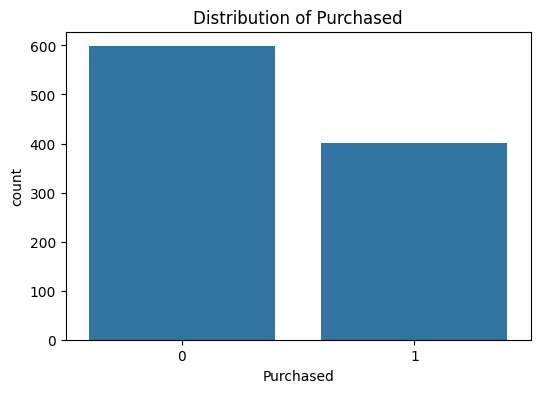

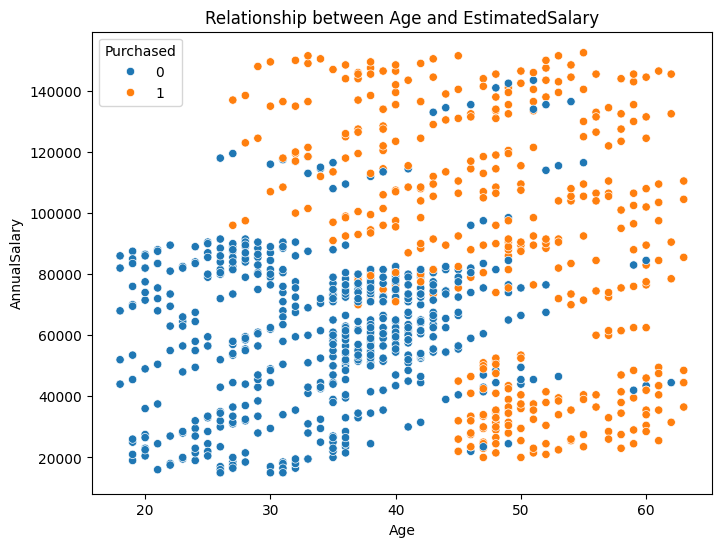

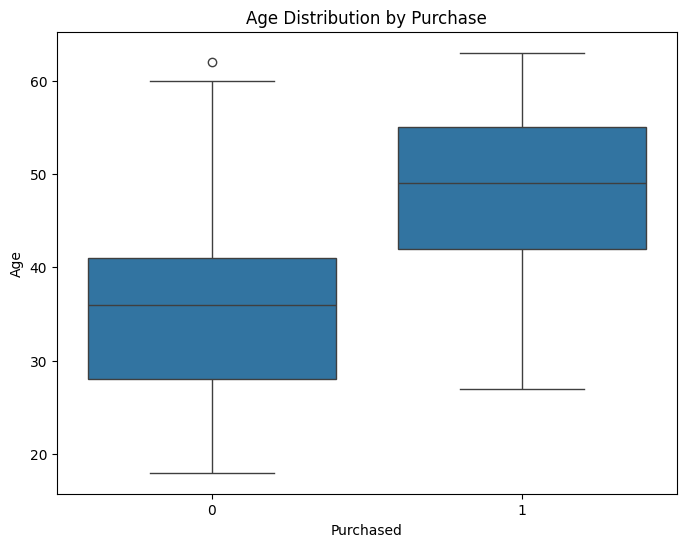

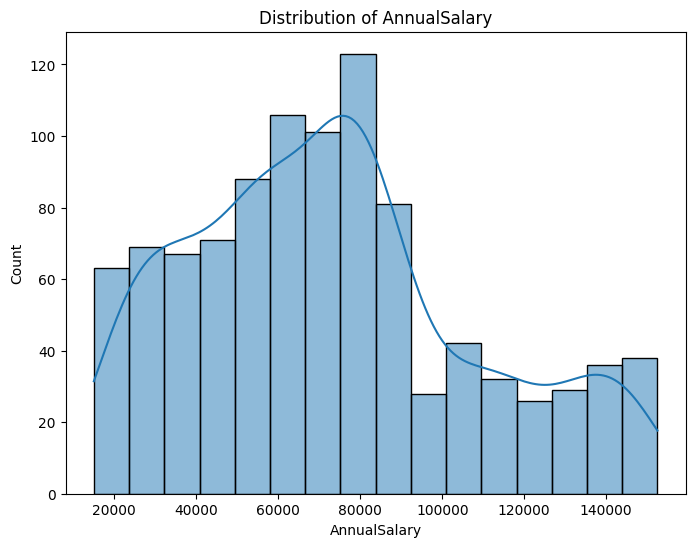

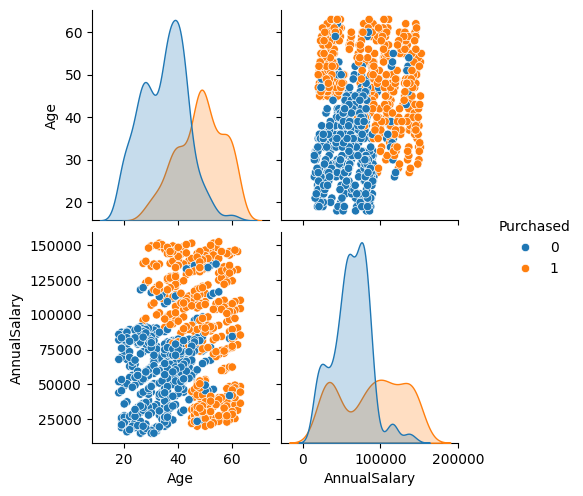

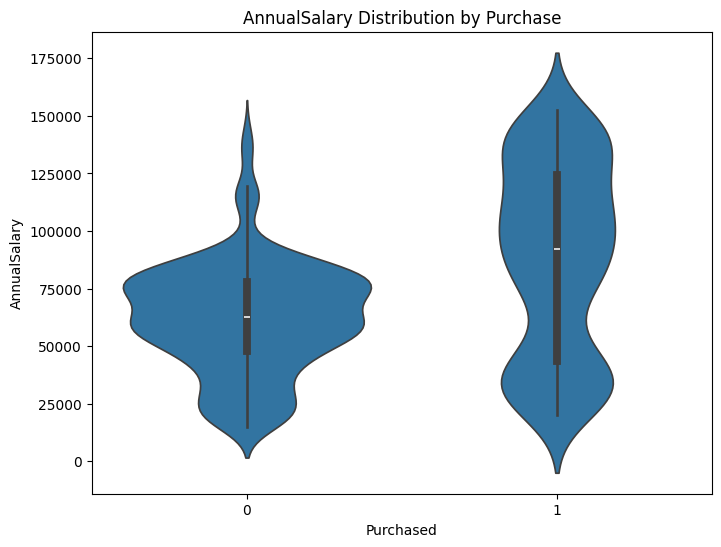

In [16]:
# Distribution of 'Purchased'
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchased', data=df)
plt.title('Distribution of Purchased')
plt.show()


# Relationship between 'Age' and 'EstimatedSalary'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='AnnualSalary', hue='Purchased', data=df)
plt.title('Relationship between Age and EstimatedSalary')
plt.show()


# Box plot of 'Age' for each 'Purchased' category
plt.figure(figsize=(8, 6))
sns.boxplot(x='Purchased', y='Age', data=df)
plt.title('Age Distribution by Purchase')
plt.show()


# Distribution of 'EstimatedSalary'
plt.figure(figsize=(8, 6))
sns.histplot(df['AnnualSalary'], kde=True)
plt.title('Distribution of AnnualSalary')
plt.show()


# Pairplot to visualize relationships between numerical features
sns.pairplot(df, hue='Purchased')
plt.show()

# Violin plot for visualizing distribution of EstimatedSalary across Purchased categories
plt.figure(figsize=(8,6))
sns.violinplot(x='Purchased', y='AnnualSalary', data=df)
plt.title('AnnualSalary Distribution by Purchase')
plt.show()



<Axes: xlabel='Gender', ylabel='count'>

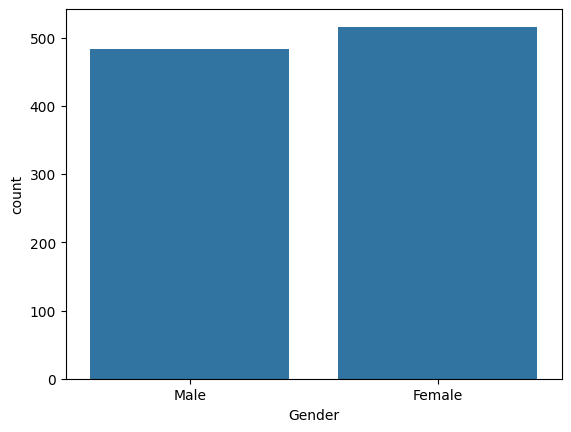

In [17]:
sns.countplot(x='Gender', data=df)

In [18]:
# prompt:  Split the data into input and output variables

x = df.drop('Purchased', axis=1)
y = df['Purchased']


In [19]:
# prompt: Split this X and Y into train _data and test_data

from sklearn.model_selection import train_test_split
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 3), (200, 3), (800,), (200,))

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder for categorical encoding

# Assuming 'df' is your DataFrame


# Perform one-hot encoding on the 'Gender' column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Create an instance of OneHotEncoder
encoded_gender = encoder.fit_transform(x[['Gender']])  # Fit and transform the 'Gender' column
encoded_df = pd.DataFrame(encoded_gender, columns=encoder.get_feature_names_out(['Gender'])) # Create a DataFrame with encoded columns
x = x.drop('Gender', axis=1)  # Drop the original 'Gender' column
x = pd.concat([x, encoded_df], axis=1)  # Concatenate the encoded columns with the rest of the features

# Split this X and Y into train_data and test_data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train)
model.fit(x_train, y_train)

LinearRegression()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder for categorical encoding

# Assuming 'df' is your DataFrame

# Split the data into input and output variables
x = df.drop('Purchased', axis=1)
y = df['Purchased']

# Perform one-hot encoding on the 'Gender' column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Create an instance of OneHotEncoder
encoded_gender = encoder.fit_transform(x[['Gender']])  # Fit and transform the 'Gender' column
encoded_df = pd.DataFrame(encoded_gender, columns=encoder.get_feature_names_out(['Gender'])) # Create a DataFrame with encoded columns
x = x.drop('Gender', axis=1)  # Drop the original 'Gender' column
x = pd.concat([x, encoded_df], axis=1)  # Concatenate the encoded columns with the rest of the features

# Split this X and Y into train_data and test_data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
model.coef_

array([ 2.58070579e-02,  4.09187079e-06, -1.72306802e-02,  1.72306802e-02])

In [24]:
model.intercept_

-0.9366096908771764

In [25]:
y_pred = model.predict(x_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))
mean_absolute_error(y_test, y_pred)
r2_score(y_test, y_pred)

Mean Absolute Error: 0.3168482063023077
Mean Squared Error: 0.14110751209391148
Root Mean Squared Error: 0.37564279853860033
R2 Score: 0.42732340870977503


0.42732340870977503

In [27]:
import pickle
pickle.dump(model, open('model_car.pkl', 'wb'))

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        1000 non-null   object
 1   Age           1000 non-null   int64 
 2   AnnualSalary  1000 non-null   int64 
 3   Purchased     1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB
